## Naive Bayes analysis assumes features are statistically independent and does not depend on one another. 

## Here we will apply this in the context of college admissions.

In [1]:
## Importing the required packages

from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB, BernoulliNB
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('admissions.csv')
data.head()
data = data.dropna()
print(data.shape)
print(list(data.columns))

(400, 4)
['admit', 'gre', 'gpa', 'rank']


In [3]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
data.dtypes

admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object

In [5]:
data.describe()   

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


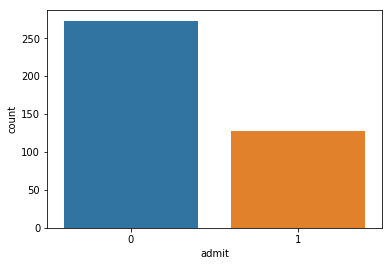

In [6]:
sns.countplot(x = 'admit', data = data)  

In [8]:
Features = np.array(data[['gre', 'gpa', 'rank']])
Labels =  np.array(data[['admit']])   

## Splitting the data into training and test data subsets

In [9]:
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

## Standardizing the dataset using the zscore method.

In [10]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

## Fit a Gaussian Naive Bayes model. 

In [11]:
NB_mod = GaussianNB()
NB_mod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## The test features are scaled using the scalar computed for the training features. Then we predict the Naive Bayes model to compute the scores from the scaled features.

In [12]:
X_test = scale.transform(X_test)
scores = NB_mod.predict(X_test)

## Evaluating the performance of the model.

In [14]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                  Score Not Admit   Score Admit    ')
    print('Actual Not Admit     %6d' % conf[0,0] + '            %5d' % conf[0,1]  )            
    print('Actual Admit         %6d' % conf[1,0] + '            %5d' % conf[1,1]  )
        ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Not Admit  Admit  ')
    print('Num case    %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1]         )
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1]        )
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1]        )
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1]        ) 
    
print_metrics_3(y_test, scores)

                 Confusion matrix
                  Score Not Admit   Score Admit    
Actual Not Admit        171               37
Actual Admit             56               36

Accuracy        0.69
 
          Not Admit  Admit  
Num case    208.00     92.00
Precision   0.75      0.49
Recall      0.82      0.39
F1          0.79      0.44


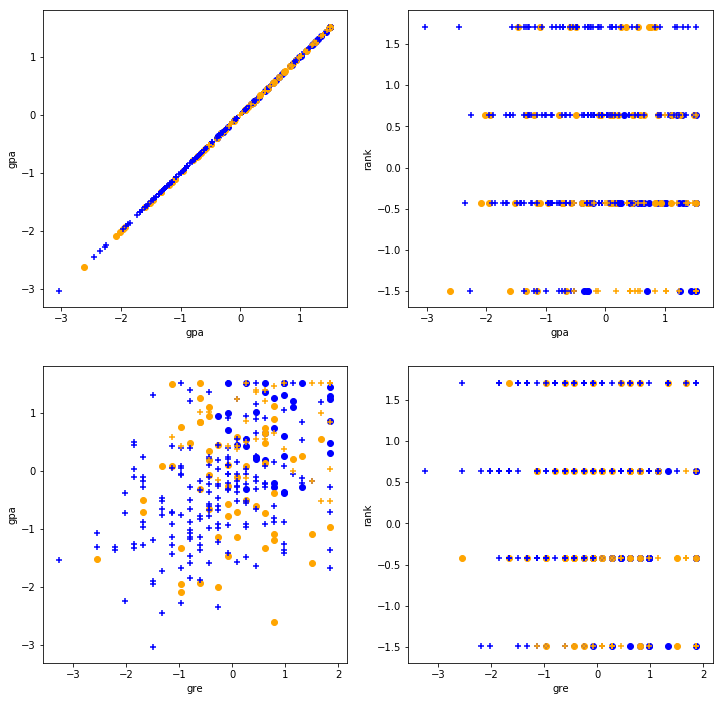

In [18]:
# Displays a set of plots showing correctly (as '+') and incorrectly (as 'o') cases

def plot_data_score(data, y_test, scores):
    '''Function to plot data data by type'''
    ## Find correctly and incorrectly classified cases
    true = np.equal(scores, y_test).astype(int)
    
    ## Create data frame from the test data
    data = pd.DataFrame(data)
    levels = {0:'Not Admit', 1:'Admit'}
    data['admit'] = [levels[x] for x in y_test]
    data.columns = ['gre', 'gpa', 'rank', 'admit']     
    
    ## Set up for the plot
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    markers = ['o', '+']
    x_ax = ['gpa', 'gre']
    y_ax = ['gpa', 'rank']
    
    for t in range(2): # loop over correct and incorect classifications
        NotAdmit = data[(data['admit'] == 'Not Admit') & (true == t)]
        Admit = data[(data['admit'] == 'Admit') & (true == t)]
        
        # loop over all the dimensions
        for i in range(2):
            for j in range(2):
                ax[i,j].scatter(NotAdmit[x_ax[i]], NotAdmit[y_ax[j]], marker = markers[t], color = 'blue')
                ax[i,j].scatter(Admit[x_ax[i]], Admit[y_ax[j]], marker = markers[t], color = 'orange')
                ax[i,j].set_xlabel(x_ax[i])
                ax[i,j].set_ylabel(y_ax[j])

plot_data_score(X_test, y_test, scores)

## Now we are going to use the Bernoulli Naive Bayes model.

                 Confusion matrix
                  Score Not Admit   Score Admit    
Actual Not Admit        208                0
Actual Admit             92                0

Accuracy        0.69
 
          Not Admit  Admit  
Num case    208.00     92.00
Precision   0.69      0.00
Recall      1.00      0.00
F1          0.82      0.00


C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


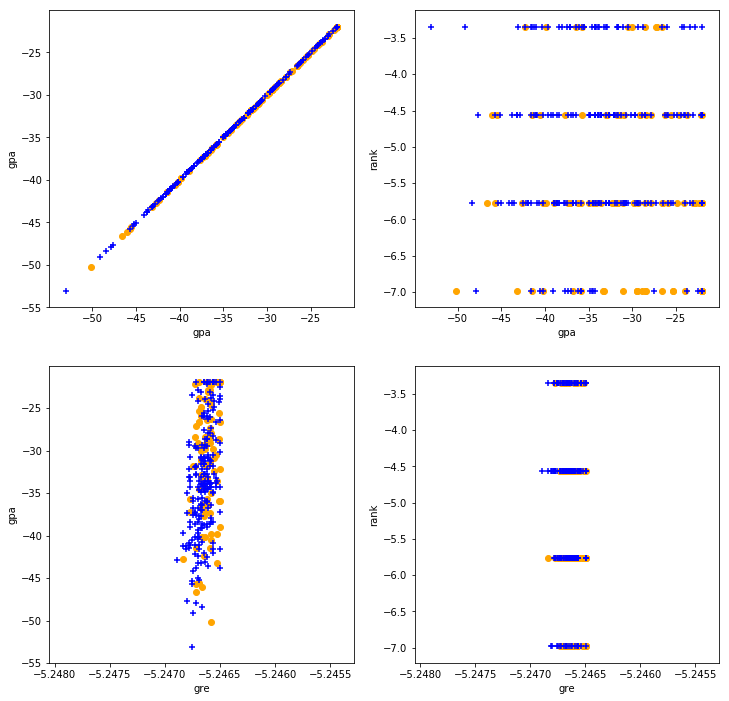

In [21]:
NB_mod = BernoulliNB()
NB_mod.fit(X_train, y_train) 
X_test = scale.transform(X_test)
scores = NB_mod.predict(X_test)
print_metrics_3(y_test, scores)
plot_data_score(X_test, y_test, scores)

## Overall both the Gaussian and Bernoulli Naive Bayes models have the same levels of accuracy. 